In [2]:
import pandas as pd

In [26]:
import numpy as np

In [27]:
import math

In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
df = pd.read_csv('hotel-reviews.csv')
print(df.columns)
print(df.shape)

df = df.dropna()
print(df.User_ID.nunique())
print(df.Is_Response.nunique())

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')
(38932, 5)
38932
2


In [2]:
df.groupby("Is_Response")['Is_Response'].agg('count')

Is_Response
happy        26521
not happy    12411
Name: Is_Response, dtype: int64

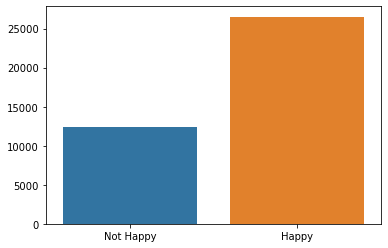

In [3]:
import numpy as np
zero = len(df[df.Is_Response =='not happy'])
one = len(df[df.Is_Response =='happy'])

li_response = [zero,one]
label_response = ['Not Happy','Happy']

index_response = np.arange(len(li_response))
sn.barplot(label_response,li_response)
plt.show()


Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64


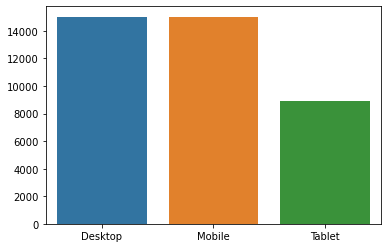

In [4]:
df['Browser_Used'].shape
df['Browser_Used'].value_counts()


device = df.Device_Used
desktop = len(device[device=='Desktop'])
mobile = len(device[device=='Mobile'])
tablet = len(device[device=='Tablet'])
print(device.value_counts())
label_device = ['Desktop','Mobile','Tablet']
li_device = [desktop,mobile,tablet]

index_device = np.arange(len(label_device))

sn.barplot(label_device,li_device)
plt.show()

In [5]:
reviewdata=df.drop(columns=['User_ID','Browser_Used','Device_Used'], inplace=True)
df

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [6]:
import re
import string

def text_clean_1(text):
    text=text.lower()
    text=re.sub('\[.*?\]', '',text)
    text=re.sub('[%s]'% re.escape(string.punctuation), '',text)
    text=re.sub('\w*d\w','', text)
    return text
cleaned= lambda x: text_clean_1(x)

In [7]:
df['cleaned_description']=pd.DataFrame(df.Description.apply(cleaned))
df.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my and i stayed here to celebrate our th ys w...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,rful staff great location but it was finately ...


In [8]:
def text_clean_2(text):
    text=re.sub('[''"""]','',text)
    text=re.sub('\n','', text)
    return text
cleaned2= lambda x: text_clean_2(x)

In [9]:
df['cleaned_description_new']=pd.DataFrame(df['cleaned_description'].apply(cleaned2))

In [10]:
df.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my and i stayed here to celebrate our th ys w...,my and i stayed here to celebrate our th ys w...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,rful staff great location but it was finately ...,rful staff great location but it was finately ...


# model training

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
Independent_var=df.cleaned_description_new
Dependent_var=df.Is_Response

In [13]:
IV_train, IV_test, DV_train, DV_test=train_test_split(Independent_var,Dependent_var, test_size=0.1,random_state=225)
print('IV_train: ', len(IV_train))
print('IV_test: ', len(IV_test))
print('DV_train: ', len(DV_train))
print('DV_test: ', len(DV_test))

IV_train:  35038
IV_test:  3894
DV_train:  35038
DV_test:  3894


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [15]:
tvec=TfidfVectorizer()
clf2=LogisticRegression(solver = 'lbfgs')

In [16]:
from sklearn.pipeline import Pipeline



In [17]:
model=Pipeline([('vectorizer' , tvec),('Classifier' , clf2)])
model.fit(IV_train ,DV_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('Classifier', LogisticRegression())])

# confusion matrix


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
prediction=model.predict(IV_test)

In [20]:
confusion_matrix(prediction, DV_test)

array([[2418,  306],
       [ 153, 1017]], dtype=int64)

# model prediction

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [22]:
print("Accuracy:", accuracy_score(prediction, DV_test))
print("Precision:", precision_score(prediction, DV_test ,average='weighted'))
print("Recall:", recall_score(prediction, DV_test, average='weighted'))

Accuracy: 0.8821263482280431
Precision: 0.8888758956340842
Recall: 0.8821263482280431


# trying on new review

In [23]:
ex=["not good"]
res=model.predict(ex)
print(res)

['not happy']


In [24]:
print(model.score(IV_test,DV_test))

0.8821263482280431


###  Made by Dipannita Pal